In [1]:
import pandas as pd

In [28]:
file_name = "ПП 2024 27.08.2024.xlsx"
dfs = pd.read_excel(file_name, sheet_name=None)

In [29]:
dfs_original = dfs["Потребности"] 

## Data prep

In [1]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Загрузка стоп-слов и других ресурсов NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Функция для замены знаков препинания пробелами
def remove_punctuation(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        return re.sub(r'[^\w\s]', ' ', text)  # Заменяем все символы, кроме букв, цифр и пробелов, на пробелы
    return text

# Функция для приведения текста к нижнему регистру
def to_lowercase(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        return text.lower()
    return text

# Функция для удаления цифр
def remove_numbers(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        return re.sub(r'\d+', '', text)
    return text

def remove_useless_numbers(text):
    if isinstance(text, str):
        # Регулярное выражение для чисел с единицами длины (например, мм, см, м)
        length_pattern = r'\b\d+(?:,\d+)?\s*(мм|см|м)\b'

        # Регулярное выражение для процентов (например, числа со знаком процента)
        percent_pattern = r'(\d+(?:,\d+)?)\s*%'

        # Регулярное выражение для химических названий (например, 1,2-дихлорэтан)
        chemical_pattern = r'\b(\d+\s*(?:,\d+))+\s*(?:-\s*[a-zA-Zа-яА-Я\-]+)\b'

        # Регулярное выражение для любых чисел, которые не попадают под нужные паттерны
        invalid_numbers_pattern = r'\b\d+(?:,\d+)?\s*[a-zA-Zа-яА-Я\-]*\b'
        
        # Комбинированное регулярное выражение для подходящих чисел
        valid_numbers_pattern = f'({length_pattern})|({percent_pattern})|({chemical_pattern})'
        
        # Находим все подходящие шаблоны
        valid_numbers = re.findall(valid_numbers_pattern, text)
        
        # Преобразуем в список подходящих чисел
        valid_numbers = [item for sublist in valid_numbers for item in sublist if item]
        
        # Заменяем неподходящие числа на пустую строку
        text = re.sub(invalid_numbers_pattern, lambda match: match.group(0) if match.group(0) in valid_numbers else '', text)

    return text
    

#удаление сокращений
def remove_abbreviation(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        return re.sub(r'\b[A-ZА-ЯЁ]{1,5}\b|\b[a-zа-яё]{1,3}\.\b', '', text)
    return text
    
# Функция для удаления стоп-слов (предлогов, союзов и т.д.)
def remove_stopwords(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        stop_words = set(stopwords.words('russian'))  # Можно использовать 'english' для английского текста
        words = nltk.word_tokenize(text)
        return ' '.join([word for word in words if word not in stop_words])
    return text

# Функция для стемминга
stemmer = SnowballStemmer("russian")

def stem_text(text):
    if isinstance(text, str):  # Проверяем, что text это строка
        words = nltk.word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

def remove_nan_rows(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Столбец {column_name} не найден в DataFrame")
    # Удалить строки с NaN в указанном столбце
    df_cleaned = df.dropna(subset=[column_name])
    return df_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wormsin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wormsin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/wormsin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
def clean_text_column(df, column, oper):
    if oper[0] == 1:
        df = remove_nan_rows(df, column)
    if oper[1] == 1:
        df[column] = df[column].apply(remove_punctuation)
    if oper[2] == 1:
        df[column] = df[column].apply(remove_abbreviation)
    if oper[3] == 1:
        df[column] = df[column].apply(remove_useless_numbers)
    if oper[4] == 1:
        df[column] = df[column].apply(to_lowercase)
    if oper[5] == 1:
        df[column] = df[column].apply(remove_stopwords)
    if oper[6] == 1:
        df[column] = df[column].apply(stem_text)
    
    return df

In [3]:
list_of_strings = ["remove_nan_rows", "remove_punctuation", "remove_abbreviation", "remove_numbers", 
                   "to_lowercase", "remove_stopwords", "stem_text"]
dict_from_list = {i: s for i, s in enumerate(list_of_strings)}
dict_from_list

{0: 'remove_nan_rows',
 1: 'remove_punctuation',
 2: 'remove_abbreviation',
 3: 'remove_numbers',
 4: 'to_lowercase',
 5: 'remove_stopwords',
 6: 'stem_text'}

## Data Analysis

анализ данных по отделам: частота, complexity in terms of abreviations, (нужно ли делать специальную токенизацию или можно просто убрать их)
lexical diversity 
domain-specific embeddings

### Количество слов без цифр

In [50]:
dfs_prep = clean_text_column(dfs_original, "Материал", [1, 1, 0, 1, 1, 1, 0])
dfs_prep = clean_text_column(dfs_prep, "Отдел", [0, 1, 0, 0, 1, 0, 0])


In [51]:
materials = dfs_prep['Материал']
otdel = dfs_prep["Отдел"]

In [52]:
import pandas as pd

# Добавляем столбец с длиной строки (количество символов в описании материала)
dfs_prep['Длина'] = materials.apply(len)

# Добавляем столбец с количеством слов в описании материала
dfs_prep['Количество_слов'] = materials.apply(lambda x: len(x.split()))

# Посмотрим на результат
dfs_prep.head()

,Потребитель,Материал,Сумма потребности,Срок поставки,Примечание,Отдел,Ответственный,Длина,Количество_слов
0,Лукойл-Ставролен,реагент налко,4184460.0,2024 (по заявкам Покупателя),типа Реагент НАЛКО 73550,реагенты,Унегов,13,2
1,Газпромнефть-МНПЗ,комплект металлоконструкций st спецификация mn...,NaN,2025-01-03 00:00:00,NaN,оборудование,Алексеев,74,12
2,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4
3,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4
4,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4


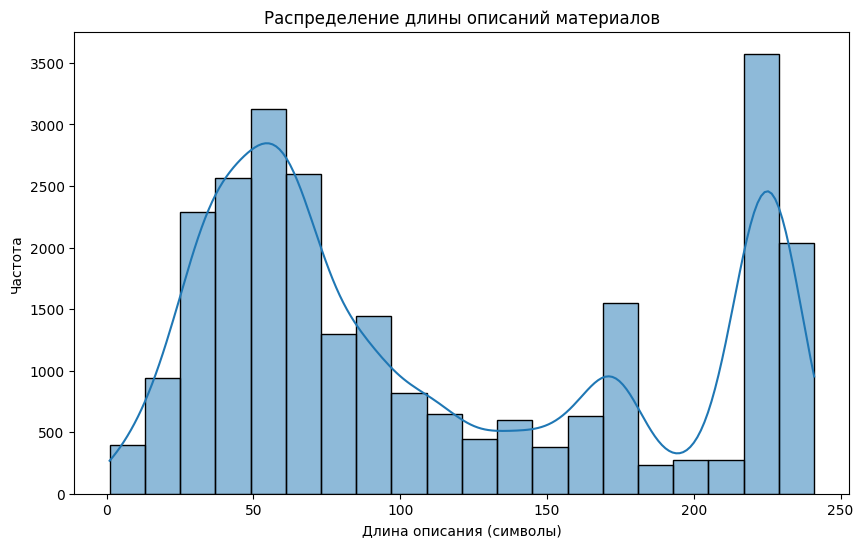

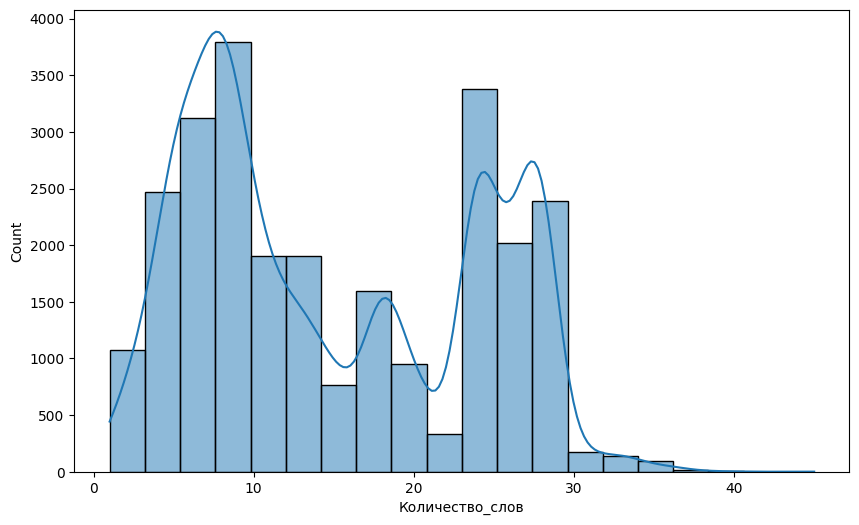

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим гистограмму длины описаний для всей таблицы

plt.figure(figsize=(10, 6))
sns.histplot(dfs_prep['Длина'], kde=True, bins=20)
plt.title('Распределение длины описаний материалов')
plt.xlabel('Длина описания (символы)')
plt.ylabel('Частота')
plt.figure(figsize=(10, 6))
sns.histplot(dfs_prep['Количество_слов'], kde=True, bins=20)
plt.show()

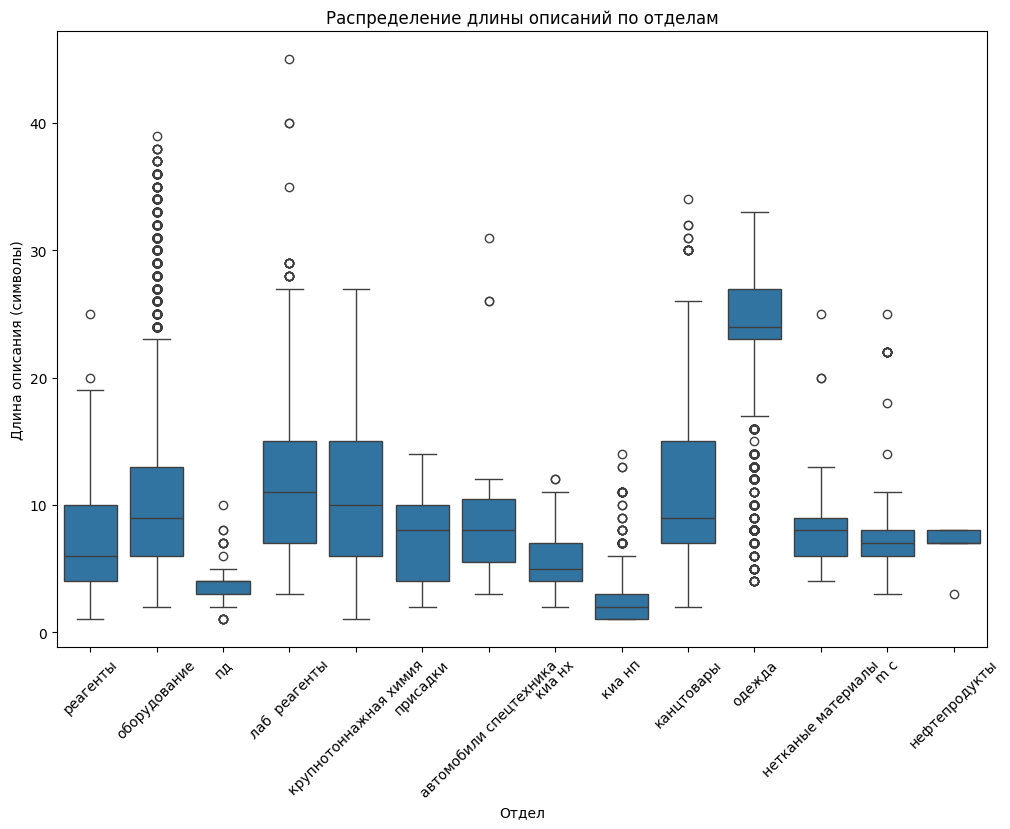

In [54]:
# Построим распределение длины описаний в зависимости от отдела
plt.figure(figsize=(12, 8))
sns.boxplot(x='Отдел', y='Количество_слов', data=dfs_prep)
plt.xticks(rotation=45)
plt.title('Распределение длины описаний по отделам')
plt.xlabel('Отдел')
plt.ylabel('Длина описания (символы)')
plt.show()

### Аббревиатуры

In [17]:
import re

# Функция для поиска аббревиатур и сокращений
def find_abbreviations(text):
    pattern = r'\b[A-ZА-ЯЁ]{1,5}\b|\b[a-zа-яё]{1,3}\.\b'
    return re.findall(pattern, text)


In [20]:
# Применяем функцию для поиска аббревиатур в каждом описании и создаем новый столбец с количеством аббревиатур
dfs_original['Аббревиатуры'] = dfs_original['Материал'].apply(lambda x: find_abbreviations(x))
dfs_original['Количество_аббревиатур'] = dfs_original['Аббревиатуры'].apply(len)

# Посмотрим на результат
dfs_original[['Материал', 'Отдел', 'Аббревиатуры', 'Количество_аббревиатур']].head()

,Материал,Отдел,Аббревиатуры,Количество_аббревиатур
0,Реагент НАЛКО 73550,Реагенты,[НАЛКО],1
1,"""Комплект металлоконструкций ST-911 Спецификац...",Оборудование,"[ST, MNPZ, SRU, RD, SPMI, SS, STS, ПМП]",8
2,"1,2-дихлорэтан технический высший сорт",Реагенты,[],0
3,"1,2-дихлорэтан технический высший сорт",Реагенты,[],0
4,"1,2-дихлорэтан технический высший сорт",Реагенты,[],0


In [21]:
# Подсчитаем среднее количество сокращений для каждого отдела
abbreviation_stats = dfs_original.groupby('Отдел')['Количество_аббревиатур'].agg(['mean', 'median', 'sum', 'min', 'max'])

# Посмотрим на результат
print(abbreviation_stats)

                            mean  median    sum  min  max
Отдел                                                    
M&C                     1.479893     1.0    552    0    6
Автомобили/Спецтехника  0.466667     0.0      7    0    1
Канцтовары              0.811980     0.0    976    0    5
КиА НП                  0.970650     1.0    463    0    6
КиА НХ                  1.208333     1.0     58    0    4
Крупнотоннажная химия   1.098806     1.0   1012    0    5
Лаб. Реагенты           0.545455     1.0      6    0    1
Лаб. реагенты           1.927948     1.0    883    0   14
Нетканые материалы      1.160991     1.0    375    0    7
Нефтепродукты           3.769231     4.0     49    1    4
Оборудование            3.682403     3.0  42668    0   26
Одежда                  1.692583     1.0  16088    0   14
ПД                      0.475410     0.0     29    0    3
Присадки                1.614130     2.0    297    0    4
Реагенты                1.109589     0.0   1053    0    6


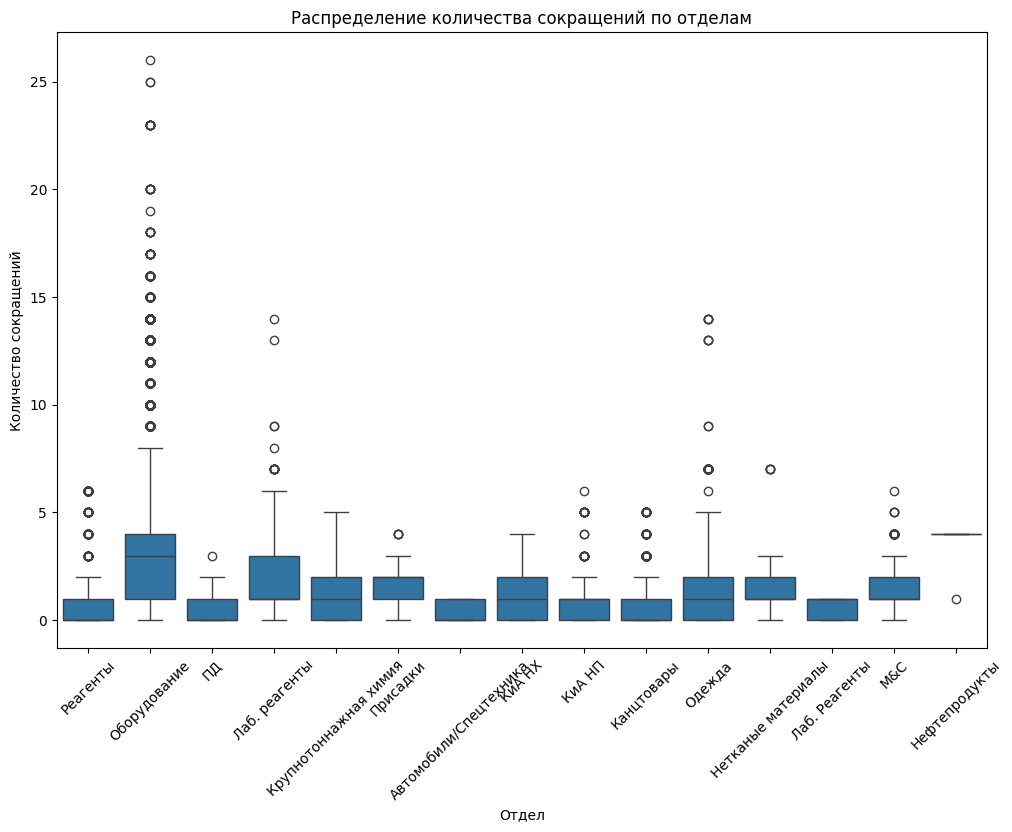

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим boxplot для количества сокращений в зависимости от отдела
plt.figure(figsize=(12, 8))
sns.boxplot(x='Отдел', y='Количество_аббревиатур', data=dfs_original)
plt.xticks(rotation=45)
plt.title('Распределение количества сокращений по отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сокращений')
plt.show()

Вывод: можно убрать сокращения и проанализировать длину строк

In [48]:
dfs_prep_abb = clean_text_column(dfs_original, "Материал", [1, 1, 1, 1, 1, 1, 0])
dfs_prep_abb = clean_text_column(dfs_prep_abb, "Отдел", [0, 1, 0, 0, 1, 0, 0])
materials = dfs_prep_abb['Материал']
otdel = dfs_prep_abb["Отдел"]

In [49]:
import pandas as pd

# Добавляем столбец с длиной строки (количество символов в описании материала)
dfs_prep_abb['Длина'] = materials.apply(len)

# Добавляем столбец с количеством слов в описании материала
dfs_prep_abb['Количество_слов'] = materials.apply(lambda x: len(x.split()))

# Посмотрим на результат
dfs_prep_abb.head()

,Потребитель,Материал,Сумма потребности,Срок поставки,Примечание,Отдел,Ответственный,Длина,Количество_слов
0,Лукойл-Ставролен,реагент,4184460.0,2024 (по заявкам Покупателя),типа Реагент НАЛКО 73550,реагенты,Унегов,7,1
1,Газпромнефть-МНПЗ,комплект металлоконструкций спецификация km,NaN,2025-01-03 00:00:00,NaN,оборудование,Алексеев,43,4
2,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4
3,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4
4,Газпромнефть-ОНПЗ,дихлорэтан технический высший сорт,NaN,2025-01-31 00:00:00,NaN,реагенты,Федчук,34,4


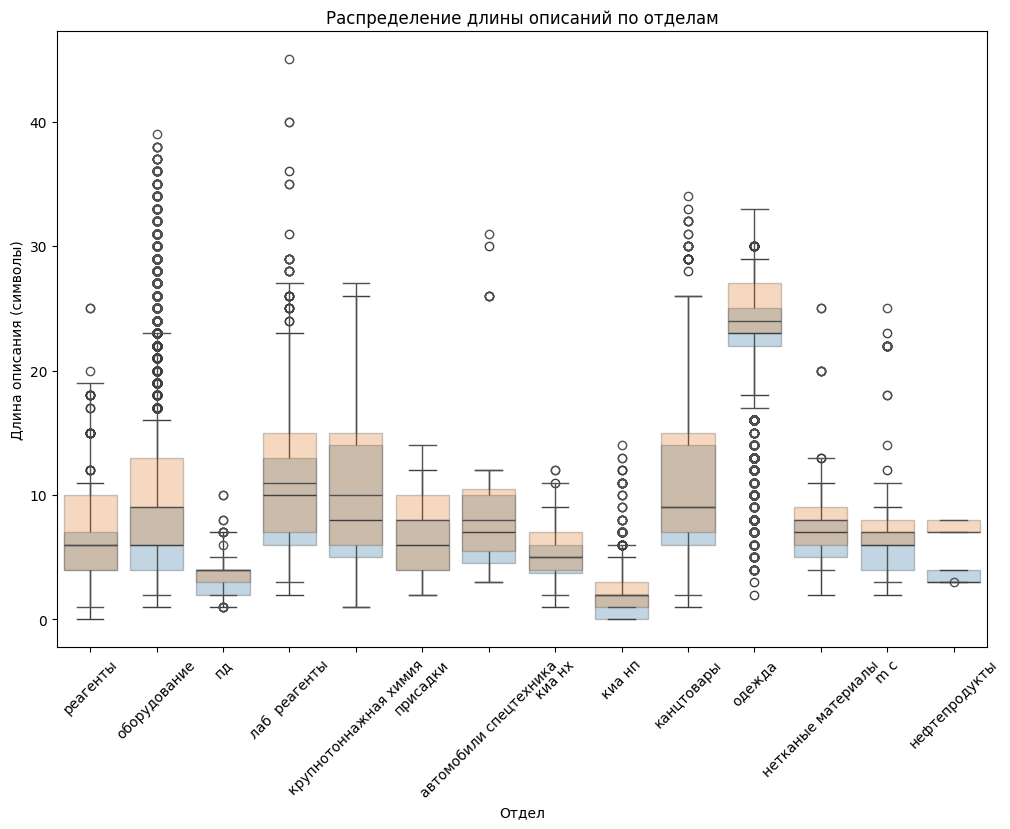

In [62]:
# Построим распределение длины описаний в зависимости от отдела
fig  = plt.figure(figsize=(12, 8))
sns.boxplot(x='Отдел', y='Количество_слов', data=dfs_prep_abb, boxprops=dict(alpha=.3))
sns.boxplot(x='Отдел', y='Количество_слов', data=dfs_prep, boxprops=dict(alpha=.3))
plt.xticks(rotation=45)
plt.title('Распределение длины описаний по отделам')
plt.xlabel('Отдел')
plt.ylabel('Длина описания (символы)')
plt.show()

Вывод: можно очистить данные от аббревиатур

### Числовые данные 

In [64]:
dfs_prep_num = clean_text_column(dfs_original, "Материал", [1, 1, 0, 0, 1, 1, 0])
dfs_prep_num = clean_text_column(dfs_prep_num, "Отдел", [0, 1, 0, 0, 1, 0, 0])

In [65]:
import re

# Функция для поиска всех цифр в строке
def find_digits(text):
    # Ищем все цифры в строке
    pattern = r'\d'
    return re.findall(pattern, text)

In [66]:
import pandas as pd


def calculate_digit_percentage(text):
    digits = find_digits(text)
    num_digits = len(digits)
    num_total = len(text.replace(' ', ''))
    if num_total == 0:
        return 0
    return (num_digits / num_total) * 100

# Применяем функцию для вычисления процента цифр в каждом описании
dfs_prep_num['Процент_цифр'] = dfs_prep_num['Материал'].apply(calculate_digit_percentage)

# Проверим результат
print(dfs_prep_num[['Материал', 'Процент_цифр']])

                                                Материал  Процент_цифр
0                                    реагент налко 73550     29.411765
1      комплект металлоконструкций st 911 спецификаци...     19.230769
2                 1 2 дихлорэтан технический высший сорт      6.060606
3                 1 2 дихлорэтан технический высший сорт      6.060606
4                 1 2 дихлорэтан технический высший сорт      6.060606
...                                                  ...           ...
26122                                           шар 20мм     28.571429
26123                                            анкс 11     33.333333
26124                                           шар 20мм     28.571429
26125                                            анкс 11     33.333333
26126                                           шар 20мм     28.571429

[26127 rows x 2 columns]


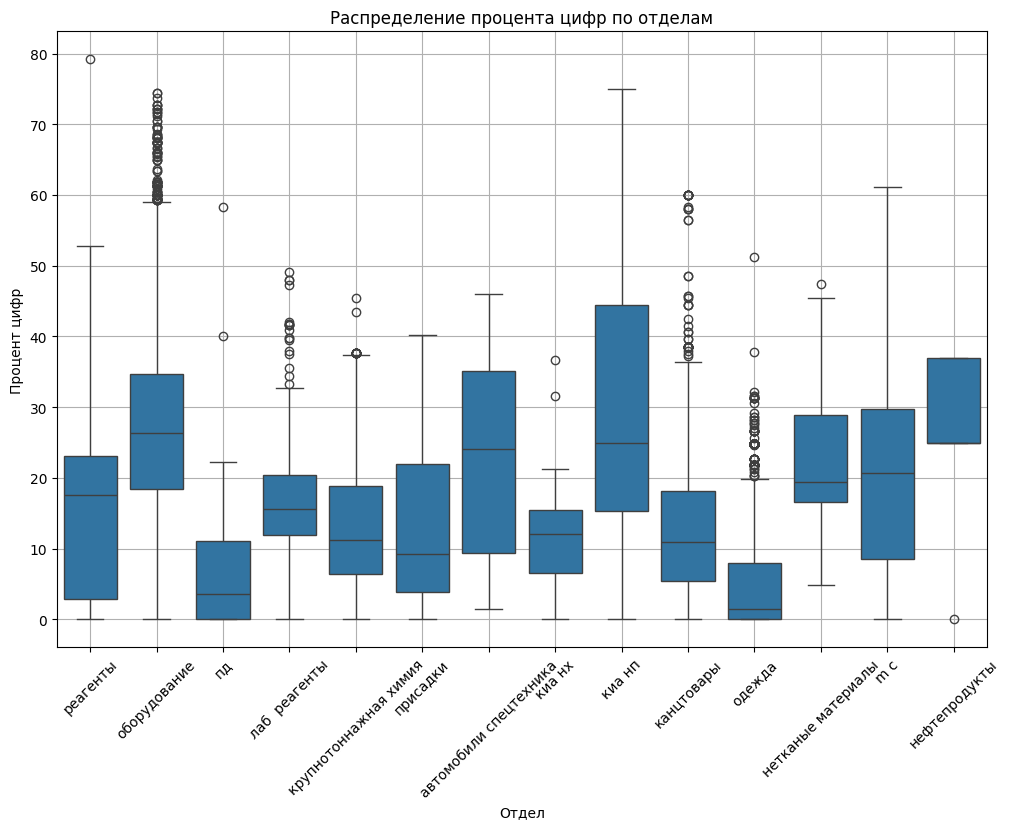

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Построение boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Отдел', y='Процент_цифр', data=dfs_prep_num)
plt.title('Распределение процента цифр по отделам')
plt.xlabel('Отдел')
plt.ylabel('Процент цифр')
plt.xticks(rotation=45)  # Поворачиваем метки на оси X, если необходимо
plt.grid(True)
plt.show()

### lexical diversity

In [168]:
dfs_prep = clean_text_column(dfs_original, "Материал", [1, 1, 1, 1, 1, 1, 0])
dfs_prep = clean_text_column(dfs_prep, "Отдел", [0, 1, 0, 0, 1, 0, 0])

In [170]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizers if you haven't already
nltk.download('punkt')

# Tokenize each text in the 'Материалы' column
dfs_prep['Tokens'] = dfs_prep['Материал'].apply(lambda text: word_tokenize(text))

# Function to calculate lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

# Calculate lexical diversity for each row
dfs_prep['Lexical_Diversity'] = dfs_prep['Tokens'].apply(lexical_diversity)

# Group by 'Отдел' and calculate the mean lexical diversity per department
lexical_diversity_by_department = dfs_prep.groupby('Отдел')['Lexical_Diversity'].mean()

# Output the result
print(lexical_diversity_by_department)

[nltk_data] Downloading package punkt to /home/wormsin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Отдел
m c                       0.985343
автомобили спецтехника    0.992063
канцтовары                0.984930
киа нп                    0.592872
киа нх                    1.000000
крупнотоннажная химия     0.923863
лаб  реагенты             0.988660
нетканые материалы        0.999524
нефтепродукты             1.000000
оборудование              0.986447
одежда                    0.977076
пд                        0.997268
присадки                  0.995553
реагенты                  0.998532
Name: Lexical_Diversity, dtype: float64


### vectore dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
file_name = "../ПП 2024 27.08.2024.xlsx"
dfs = pd.read_excel(file_name, sheet_name=None)
df = dfs["Потребности"]

df = clean_text_column(df, "Материал", [1, 1, 1, 1, 1, 1, 0])
df = clean_text_column(df, "Отдел", [0, 1, 0, 0, 0, 0, 0])

df = df[['Материал','Отдел']]

# Split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate features and labels
X_train = train_df['Материал'].values
y_train = train_df['Отдел'].values
X_test = test_df['Материал'].values
y_test = test_df['Отдел'].values

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the department names into numerical labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
num_classes

15

### Berta

In [6]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_data = Dataset.from_dict({'text': X_train, 'labels': y_train_enc})
test_data = Dataset.from_dict({'text': X_test, 'labels': y_test_enc})

tokenized_datasets_train = train_data.map(tokenize_function, batched=True)
tokenized_datasets_test = test_data.map(tokenize_function, batched=True)

/home/wormsin/miniconda3/envs/otdel-classify/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wormsin/miniconda3/envs/otdel-classify/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 5226/5226 [00:00<00:00, 8672.30 examples/s]


In [10]:
import torch
torch.cuda.empty_cache()

In [8]:
from transformers import  AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

#model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased", num_labels=15)
training_args = TrainingArguments(output_dir="../test_trainer_eval", num_train_epochs=5, per_device_train_batch_size=16)
model = AutoModelForSequenceClassification.from_pretrained("../test_trainer/checkpoint-6535")

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
     logits, labels = eval_pred
     predictions = np.argmax(logits, axis=-1)
     return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_test,
    compute_metrics=compute_metrics,
)

2024-10-23 15:13:36.335901: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 15:13:36.425915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 15:13:36.481216: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 15:13:36.492065: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 15:13:36.556686: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# Train the model
trainer.train()

In [9]:
metrics = trainer.evaluate()
print(metrics)

100%|██████████| 654/654 [01:41<00:00,  6.41it/s]

{'eval_loss': 0.08724743127822876, 'eval_model_preparation_time': 0.0017, 'eval_accuracy': 0.980673555300421, 'eval_runtime': 103.11, 'eval_samples_per_second': 50.684, 'eval_steps_per_second': 6.343}


In [9]:
predictions = trainer.predict(tokenized_datasets_test)
logits = predictions.predictions

100%|██████████| 654/654 [01:42<00:00,  6.38it/s]


In [11]:
logits[0]

array([-1.0472821 , -1.4574258 ,  0.3539691 , -0.9584302 , -1.0720935 ,
       -0.7374597 , -0.97678244, -0.922307  , -2.6501453 , -0.8252623 ,
       -0.27274886, 11.484181  , -2.5153399 , -0.6550412 , -1.2096705 ],
      dtype=float32)

In [12]:
#softmax function
logits_soft = list(map(lambda logit: np.exp(logit)*100/np.sum(np.exp(logit)), logits))

In [13]:
logits_soft[0]

array([3.6109964e-04, 2.3960944e-04, 1.4661647e-03, 3.9465260e-04,
       3.5225056e-04, 4.9224490e-04, 3.8747588e-04, 4.0916933e-04,
       7.2696319e-05, 4.5086761e-04, 7.8343431e-04, 9.9993675e+01,
       8.3187435e-05, 5.3453376e-04, 3.0697478e-04], dtype=float32)

In [14]:
import torch 
y_pred = torch.argmax(torch.tensor(logits), dim=1)
y_pred = y_pred.numpy()

In [15]:
#wrong answers
wrong_indx = np.where( y_test_enc!= y_pred)[0]

In [16]:
# doubts
doubts = 0
for i in wrong_indx:
    if len(logits_soft[i][logits_soft[i]>100/15]) > 1:
        doubts+=1
print(f'для ложных: {doubts} из {len(wrong_indx)}, {doubts*100/len(wrong_indx)}')

doubts = 0
for indx, logit in enumerate(logits_soft):
    if len(logit[logit>100/15]) > 1 and indx not in wrong_indx:
        doubts+=1
print(f'для трушных: {doubts} из {len(logits_soft)-len(wrong_indx)}, {doubts*100/(len(logits_soft)-len(wrong_indx))}')

для ложных: 60 из 101, 59.40594059405941
для трушных: 35 из 5125, 0.6829268292682927


In [17]:
# low probability ofpredicted class
doubts = 0
for i in wrong_indx:
    if np.max(logits_soft[i]) <90:
        doubts+=1
print(f'для ложных: {doubts} из {len(wrong_indx)}, {doubts*100/len(wrong_indx)}')

doubts = 0
for indx, logit in enumerate(logits_soft):
    if np.max(logit) < 90 and indx not in wrong_indx:
        doubts+=1
print(f'для трушных: {doubts} из {len(logits_soft)-len(wrong_indx)}, {doubts*100/(len(logits_soft)-len(wrong_indx))}')

для ложных: 59 из 101, 58.415841584158414
для трушных: 33 из 5125, 0.6439024390243903


In [18]:
#logits entropy 
from scipy.stats import entropy

entropy_soft = np.array([entropy(logit) for logit in logits_soft])
entropy_wrong = np.array([entropy(logits_soft[i]) for i in wrong_indx])
doubts = len(np.where(entropy_wrong>0.1)[0])
print(f'для ложных: {doubts} из {len(wrong_indx)}, {doubts*100/len(wrong_indx)}')
doubts = len(np.where(entropy_soft>0.1)[0])
print(f'для трушных: {doubts} из {len(logits_soft)-len(wrong_indx)}, {doubts*100/(len(logits_soft)-len(wrong_indx))}')

для ложных: 76 из 101, 75.24752475247524
для трушных: 140 из 5125, 2.731707317073171


In [19]:
#difference between the first two elements
sorted_soft = np.array([np.sort(logit) for logit in logits_soft])  
sorted_wrong = np.array([np.sort(logits_soft[i]) for i in wrong_indx])
margin_soft = np.array([(logit[-1] - logit[-2]) for logit in sorted_soft])
margin_wrong= np.array([(logit[-1] - logit[-2]) for logit in sorted_wrong])

In [20]:
doubts = 0
for margin in margin_wrong:
    if margin <50:
        doubts+=1
print(f'для ложных: {doubts} из {len(wrong_indx)}, {doubts*100/len(wrong_indx)}')

doubts = 0
for indx, margin in enumerate(margin_soft):
    if margin <50 and indx not in wrong_indx:
        doubts+=1
        
print(f'для трушных: {doubts} из {len(logits_soft)-len(wrong_indx)}, {doubts*100/(len(logits_soft)-len(wrong_indx))}')

для ложных: 33 из 101, 32.67326732673267
для трушных: 21 из 5125, 0.4097560975609756


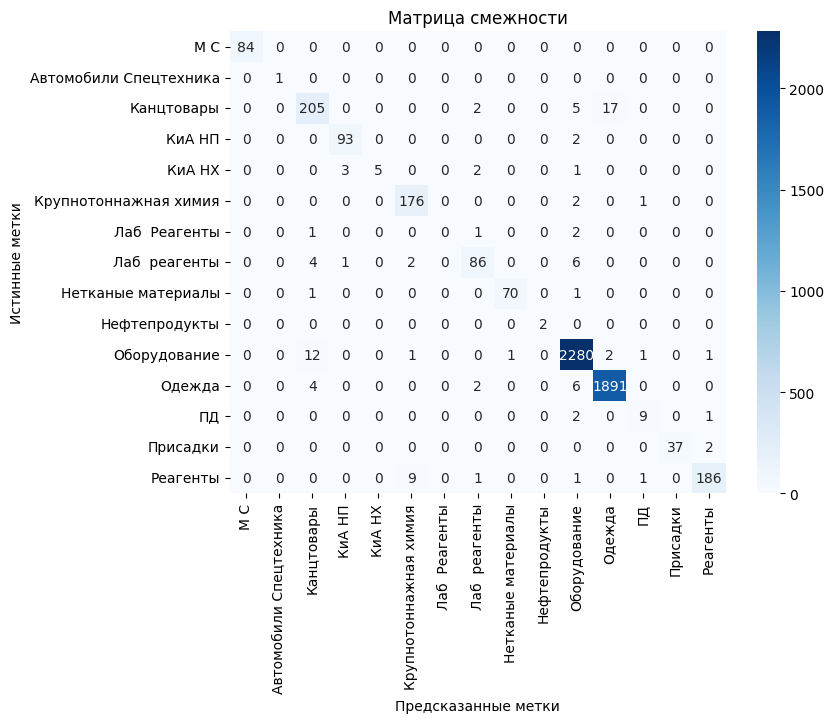

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Построение матрицы смежности
cm = confusion_matrix(y_test_enc, y_pred)

# Визуализация матрицы смежности
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица смежности')
plt.show()

In [76]:
np.sum(cm) - np.sum(np.diag(cm))

101

['M C' 'Автомобили Спецтехника' 'Канцтовары' 'КиА НП' 'КиА НХ'
 'Крупнотоннажная химия' 'Лаб  Реагенты' 'Лаб  реагенты'
 'Нетканые материалы' 'Нефтепродукты' 'Оборудование' 'Одежда' 'ПД'
 'Присадки' 'Реагенты']


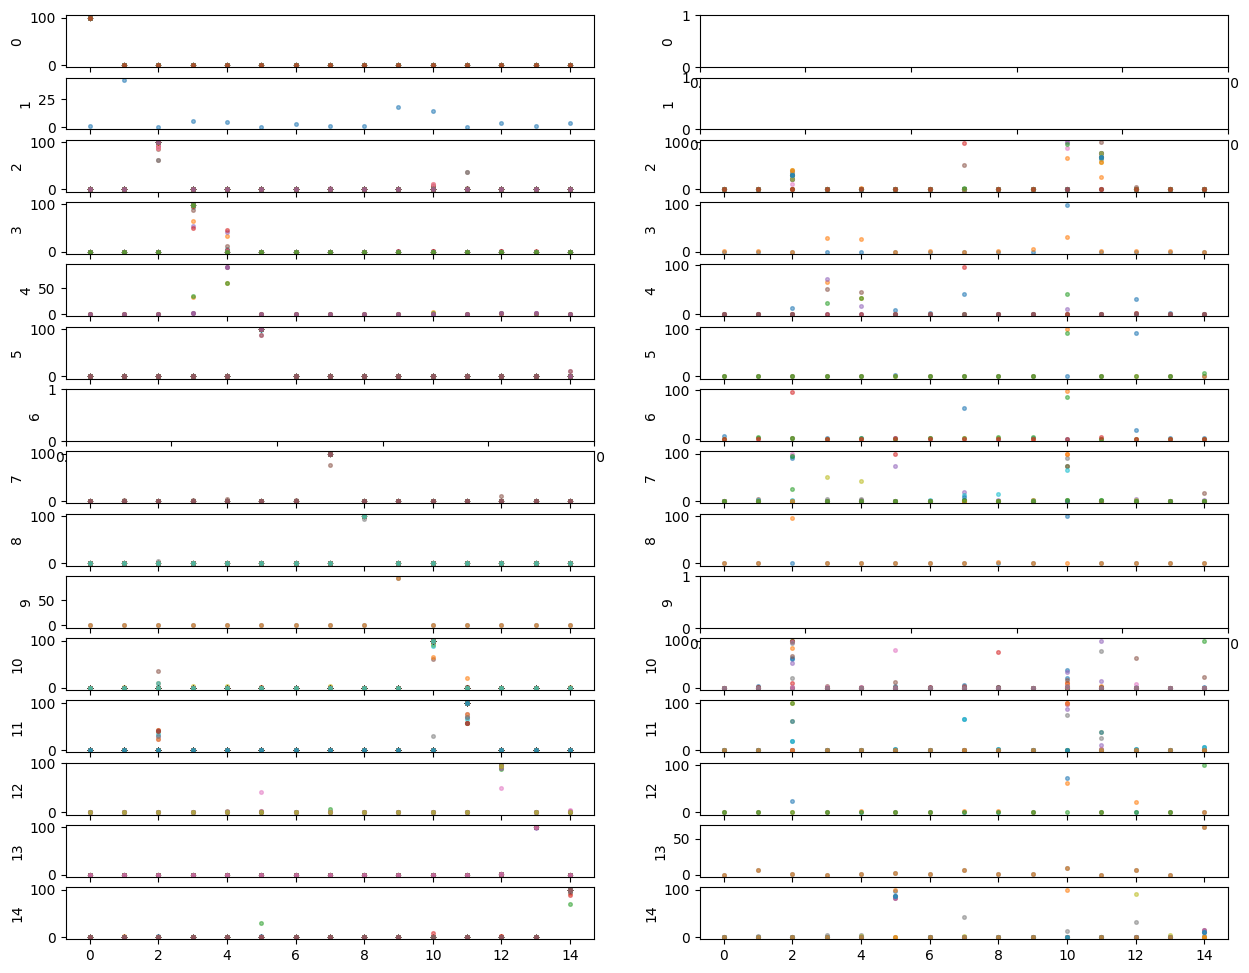

In [82]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(15, 2, figsize=(15, 12)) 
#axs = axs.ravel()
yticklabels=np.unique(y_test)
x_axs = range(15)
for otdel in x_axs:
    for indx, logit in enumerate(logits_soft):
        if indx in wrong_indx and y_test_enc[indx] == otdel:
            axs[otdel, 1].scatter(x_axs, logit, alpha = 0.5, s =7)
        elif y_test_enc[indx] == otdel and indx not in wrong_indx:
            axs[otdel, 0].scatter(x_axs, logit, alpha = 0.5, s=7)
    axs[otdel,0].set_ylabel(f'{otdel}')
    axs[otdel,1].set_ylabel(f'{otdel}')

#plt.tight_layout()
print(yticklabels)
plt.show()

['M C' 'Автомобили Спецтехника' 'Канцтовары' 'КиА НП' 'КиА НХ'
 'Крупнотоннажная химия' 'Лаб  Реагенты' 'Лаб  реагенты'
 'Нетканые материалы' 'Нефтепродукты' 'Оборудование' 'Одежда' 'ПД'
 'Присадки' 'Реагенты']


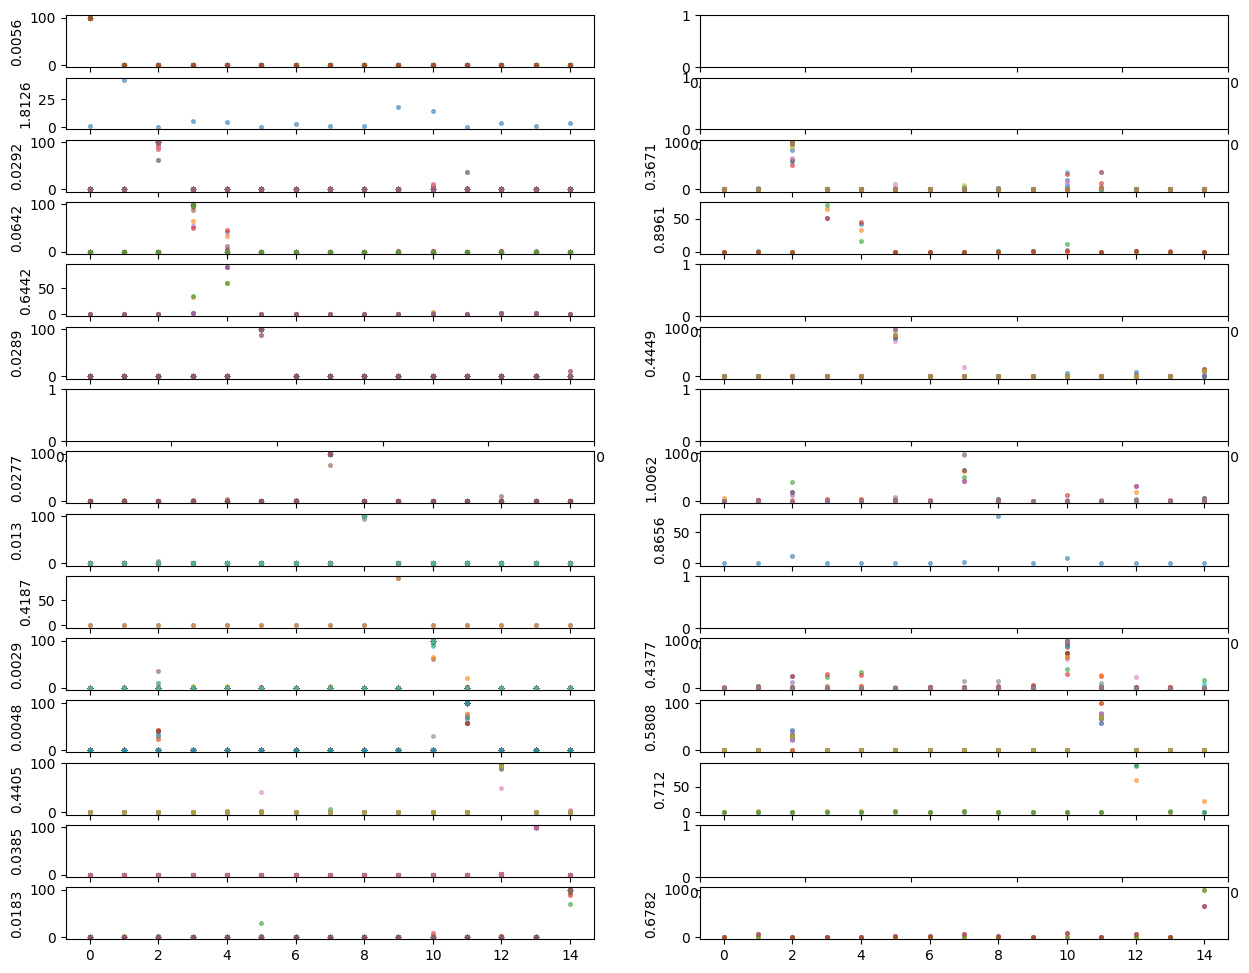

In [96]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(15, 2, figsize=(15, 12)) 
#axs = axs.ravel()
yticklabels=np.unique(y_test)
x_axs = range(15)
for otdel in x_axs:
    ylabel = 0
    total = 0
    xlabel = 0
    xtotal = 0
    for indx, logit in enumerate(logits_soft):
        if indx in wrong_indx and y_pred[indx] == otdel:
            axs[otdel, 1].scatter(x_axs, logit, alpha = 0.5, s =7)
            ylabel+=entropy_wrong[np.where(wrong_indx == indx)[0][0]]
            total+=1
        elif y_test_enc[indx] == otdel and indx not in wrong_indx:
            axs[otdel, 0].scatter(x_axs, logit, alpha = 0.5, s=7)
            xlabel+=entropy_soft[indx]
            xtotal+=1
    if xtotal!=0:
        axs[otdel,0].set_ylabel(f'{np.round(xlabel/xtotal, 4)}')
    if total!=0:
        axs[otdel,1].set_ylabel(f'{np.round(ylabel/total, 4)}')

#plt.tight_layout()
print(yticklabels)
plt.show()

##  Monte Carlo Dropout

In [ ]:
input_text = [for i in wwrong]

In [11]:
inputs = tokenizer(X_test.tolist(),padding=True, truncation=True, return_tensors='pt').to('cpu')

In [ ]:
model.train()
num_passes = 10
outputs = []
y_pred_total = []
y_var_total = []

model.to('cpu')

for _ in range(num_passes):
    with torch.no_grad():
        output = model(**inputs)  # Inference with dropout enabled
        outputs.append(output.logits)
stacked_outputs = torch.stack(outputs)
mean_output = torch.mean(stacked_outputs, dim=0)
variance = torch.var(stacked_outputs, dim=0)
